In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET


In [8]:
df = pd.read_csv('/content/Iris.csv')

In [9]:
df.head(5)
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


VISUALISATION OF DATASET

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


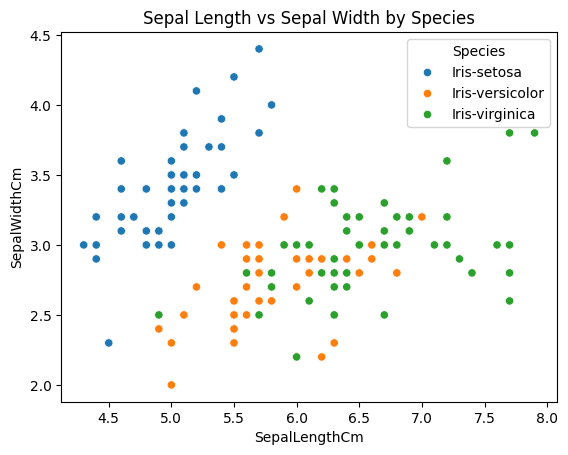

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()



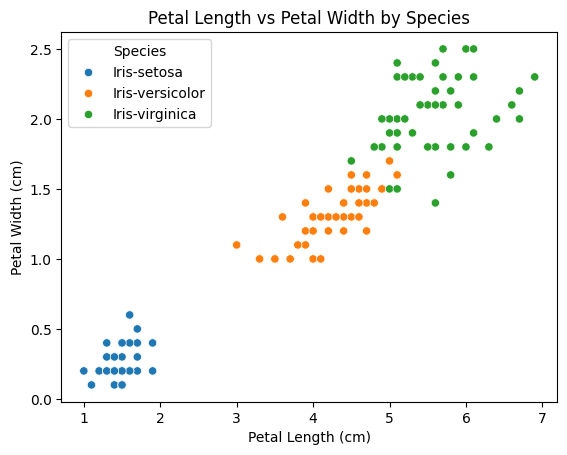

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title("Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


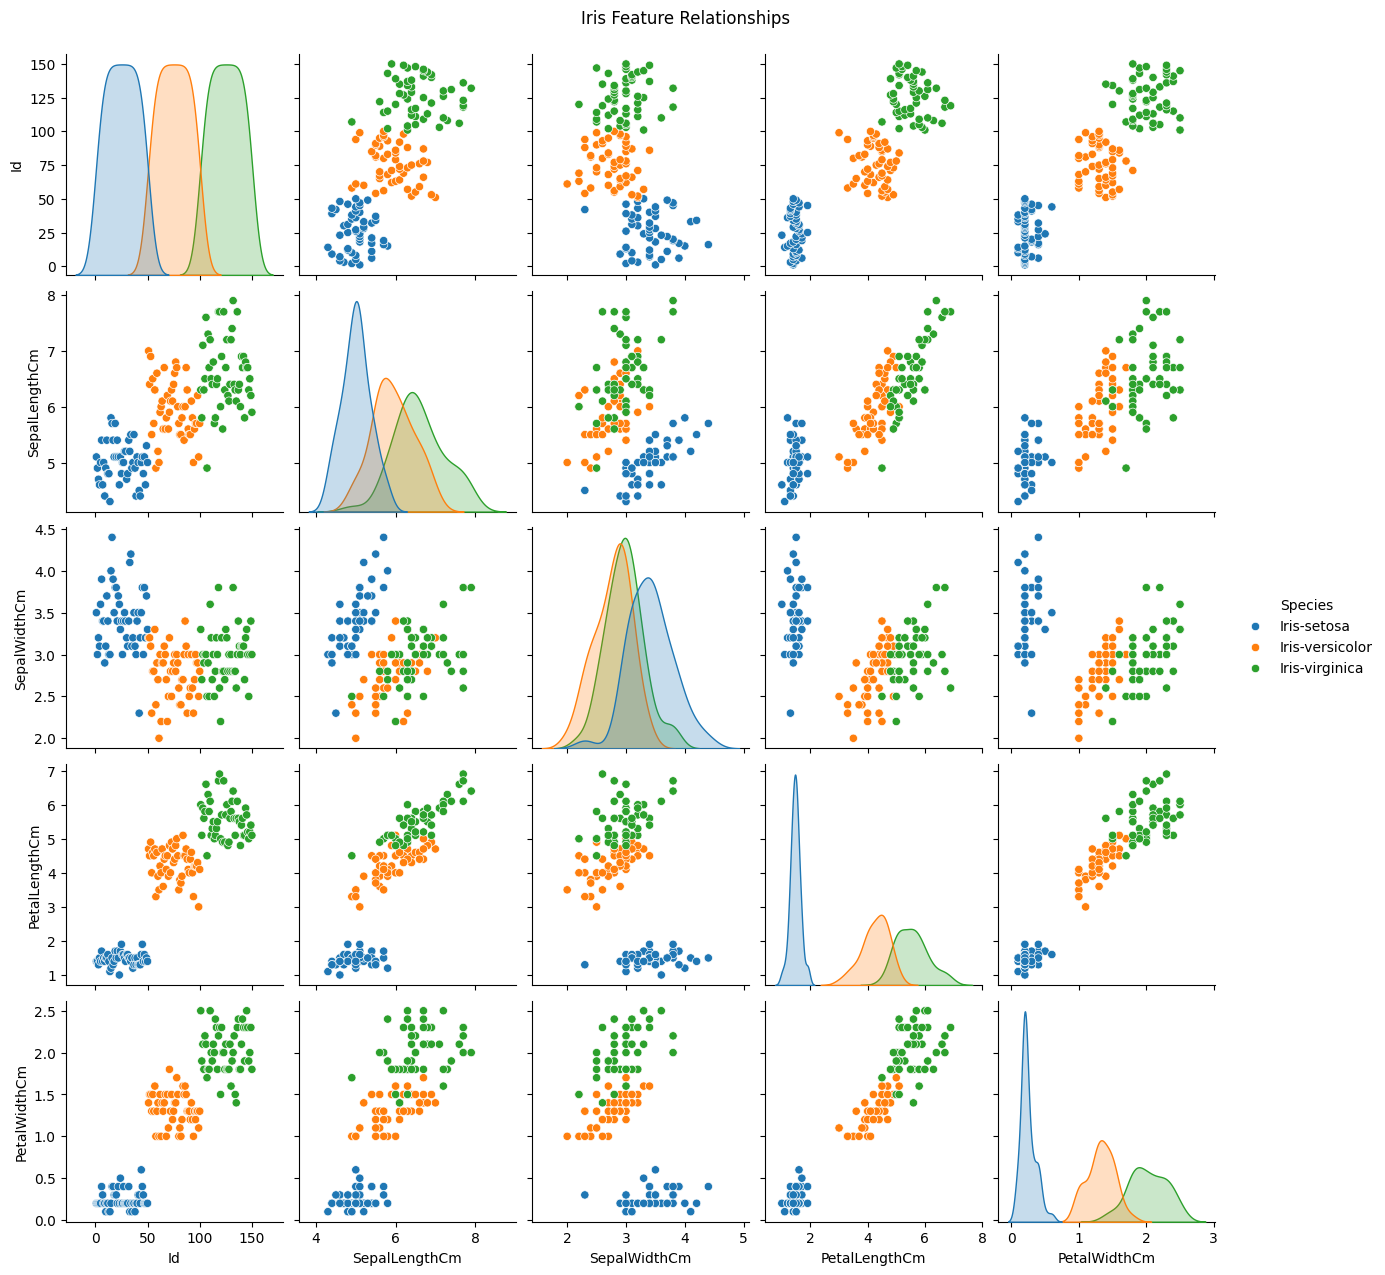

In [13]:
sns.pairplot(df, hue='Species')
plt.suptitle("Iris Feature Relationships", y=1.02)
plt.show()


In [18]:
# Features (X) and Target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("🔍 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


🔍 Logistic Regression Results:
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)

print("🌳 Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


🌳 Decision Tree Results:
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


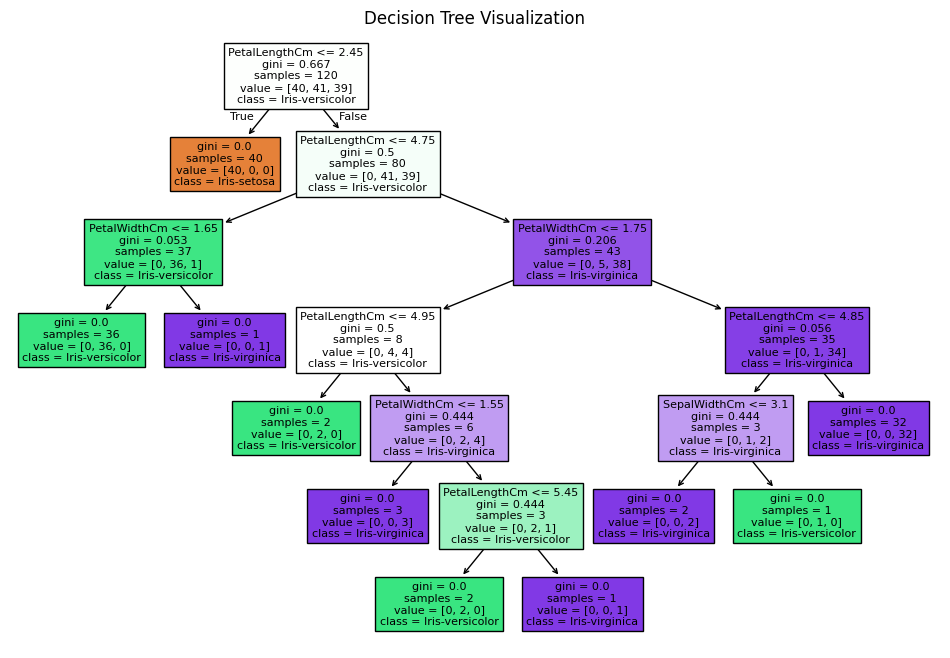

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=X.columns, class_names=dtree.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dtree, X, y, cv=5)
print("Decision Tree Cross-Validation Accuracy: ", cv_scores.mean())


Decision Tree Cross-Validation Accuracy:  0.9533333333333334


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and Train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("📌 KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


📌 KNN Results:
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
from sklearn.svm import SVC

# Initialize and Train
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("📌 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


📌 SVM Results:
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("📌 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


📌 Random Forest Results:
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = rf.feature_importances_

# Create a pandas Series for easy plotting
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)


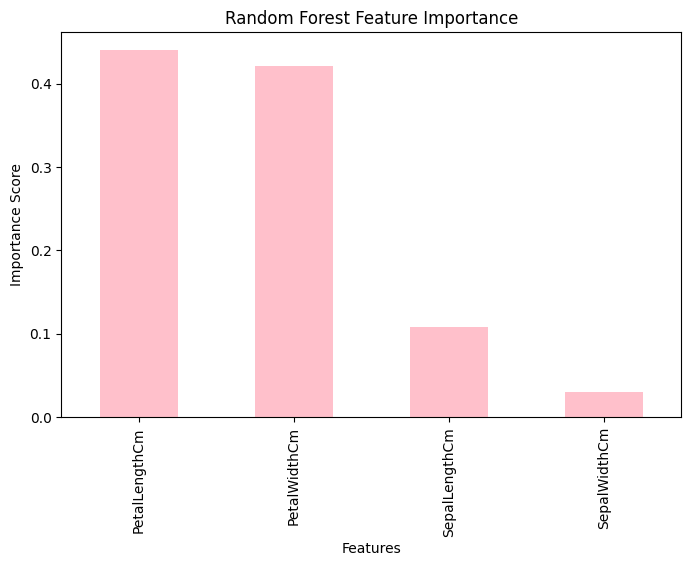

In [39]:
# Plot
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar', color='pink')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


In [40]:
import joblib

# Save Random Forest
joblib.dump(rf, 'random_forest_iris_model.joblib')

# Save Logistic Regression
joblib.dump(logreg, 'logistic_regression_iris_model.joblib')

# Save Decision Tree
joblib.dump(dtree, 'decision_tree_iris_model.joblib')

# Save KNN
joblib.dump(knn, 'knn_iris_model.joblib')

# Save SVM
joblib.dump(svm, 'svm_iris_model.joblib')


['svm_iris_model.joblib']